In [23]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

from utils import *

In [6]:
# data = pd.read_csv('csc2548_ml4h/adult_notes.gz', compression='gzip')
data = pd.read_csv('adult_notes.gz', compression='gzip')
# my_filtered_csv = pd.read_csv(filename, usecols=['col1', 'col3', 'col7'])

In [7]:
#use NLTK to tokenize and remove stopwords and punctuation
stoplist = stopwords.words('english') + list(string.punctuation)

In [8]:
data['chartext'] = data['chartext'].astype(str)

In [9]:
stoplist = set(stoplist)

In [10]:
def remove_punction_and_stopwords(text):
    return [word for word in word_tokenize(text) if word.lower() not in stoplist and not word.isdigit()]

In [12]:
data['chartext'].apply(remove_punction_and_stopwords)

0        [**2101-10-20**, 10:23, PM, CHEST, PORTABLE, A...
1        [Nursing, Note, see, careview, complete, detai...
2        [**2149-11-10**, 11:10, CHEST, PORTABLE, AP, C...
3        [Vent, settings, changed, Vt, Simv, Fio2, Peep...
4        [Admission, CSRU, y.o, admitted, CSRU, CABG, x...
                               ...                        
27343    [**2156-11-28**, 3:32, PM, CHEST, PORT, LINE, ...
27344    [**2157-2-18**, 11:20, CHEST, PORT, LINE, PLAC...
27345    [FULL, CODE, CC, Respiratory, failure, **1-29*...
27346    [Clinician, Nurse, Patient, co, SOB, hr, high,...
27347    [**2147-2-9**, 7:04, CHEST, PORTABLE, AP, Clip...
Name: chartext, Length: 27348, dtype: object

In [13]:
#use TF-IDF to transform bag-of-word counts into numerical features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [14]:
drop_cols = ['train', 'subject_id', 'hadm_id', 'icustay_id', 'mort_icu']
# binary_cols = ['first_hosp_stay', 'first_icu_stay', 'adult_icu', 'eth_asi]
X_train = data[data['train'] == 1]
X_test = data[data['train'] == 0]
y_train = X_train['mort_icu']
y_test = X_test['mort_icu']

X_train = X_train.drop(drop_cols, axis=1)
X_test = X_test.drop(drop_cols, axis=1)

In [15]:
X_train = vectorizer.fit_transform(X_train['chartext'])
X_test = vectorizer.transform(X_test['chartext'])

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'l2', max_iter=100)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
from sklearn import metrics
y_predict = clf.predict(X_test)
y_predict_prob = clf.predict_proba(X_test)

# comment on model performance
print("Score on training set: ", clf.score(X_train,y_train))
print("Score on testing set: ", clf.score(X_test,y_test))
print("Accuracy score:",metrics.accuracy_score(y_test, y_predict))
print("No. of iterations to converge: ", clf.n_iter_)

Score on training set:  0.9110774217157196
Score on testing set:  0.9046112665774425
Accuracy score: 0.9046112665774425
No. of iterations to converge:  [79]


In [19]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label = 1)

The threshod is:  [1.85667360e+00 8.56673603e-01 7.61183685e-01 ... 7.09849851e-03
 7.09210658e-03 1.37725262e-03]
AUC score:  0.845795093350303


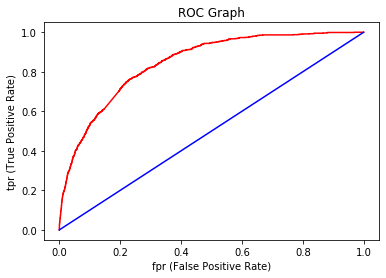

In [20]:
plot_roc(fpr, tpr,"4b_roc_graph.png")
print("The threshod is: ", thresholds)
print("AUC score: ", metrics.roc_auc_score(y_test, y_predict_prob[:,1]))

In [21]:
# def risk_factors(feature_names, coeff):
#     """
#     Report the top 5 words associated with a high risk of mortality and the lowest 5.
#     So: DO NOT use absolute value!
#     """
#     coeff_of_feature = []
#     for index in range(len(feature_names)):
#         coeff_of_feature.append([coeff[0][index], feature_names[index]])

#     coeff_of_feature = sorted(coeff_of_feature)
#     print("Top 5 risk factors: ")
#     for coefficient, factor in coeff_of_feature[-5:]:
#         print(coefficient, factor)

#     print("Lowest 5 risk factors: ")
#     for coefficient, factor in coeff_of_feature[0:5]:
#         print(coefficient, factor)

In [24]:
risk_factors(vectorizer.get_feature_names(), clf.coef_)

------------------------------
Sort the value itself: 
Top 5 risk factors: 
2.66196727652265 cmo
2.8786570599398282 dnr
3.1947298938884385 worsening
3.325859708735898 arrest
4.113160415687661 family
Lowest 5 risk factors: 
-2.8581326179529087 extubation
-2.4754993146024935 clear
-2.2323336884463436 pain
-2.0231132913932117 extubated
-1.9568480183601864 wean
------------------------------
Sort using absolute value: 
Top 5 risk factors: 
2.8581326179529087 extubation
2.8786570599398282 dnr
3.1947298938884385 worsening
3.325859708735898 arrest
4.113160415687661 family
Lowest 5 risk factors: 
2.04396812743609e-06 cpme
2.217785536195768e-06 hco
2.8723165753689643e-06 b19
6.238605940186612e-06 recvd
6.295361750354964e-06 8898
